In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
sys.path.append('../utils')
import Aircraft3dofApproxModel
import Aircraft3dofModel
import FinaltimeFreeCost
import Aircraft3dofConstraints
from scipy.integrate import solve_ivp
from Scvx_tf_free import Scvx_tf_free
from Scaling import TrajectoryScaling

In [3]:
ix = 6
iu = 3
tf = 800
N = 100
delT = tf/N
max_iter = 40


In [9]:
# myModelApprox = Aircraft3dofApproxModel.Aircraft3dofApproxModel('Hello',ix,iu,linearization="numeric_central")
myModelApprox = Aircraft3dofModel.Aircraft3dofContDensity('Hello',ix,iu,linearization="numeric_central")
myModel = Aircraft3dofModel.Aircraft3dof('Hello',ix,iu,linearization="analytic")
myCost = FinaltimeFreeCost.Finaltime('Hello',ix,iu,N)
myConst = Aircraft3dofConstraints.Aircraft3dof('Hello',ix,iu)


x_max = np.array([110*1e3,60*1e3,10*1e3,240,np.deg2rad(20),np.pi/2])
x_min = np.zeros(ix)
# x_min = -x_max
u_max = np.array([1.52,np.deg2rad(15),1]) 
u_min = np.array([0,0,0])
# u_min = -u_max

myScaling = TrajectoryScaling(x_min,x_max,u_min,u_max,tf)
Sx,iSx,sx,Su,iSu,su = myScaling.get_scaling()

In [ ]:
xi = np.array([190*1e3,0*1e3,10*1e3,240,0,-np.pi])
xf = np.array([110*1e3,-60*1e3,0,95,-np.deg2rad(3),np.deg2rad(0)])

# xi = np.array([0*1e3,0*1e3,10*1e3,200,0,0])
# xf = np.array([130*1e3,-65*1e3,0,110,-np.deg2rad(3),np.deg2rad(80)])

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf

u0 = np.zeros((N+1,iu))
ui = np.array([0.0,np.deg2rad(0),0])
uf = np.array([0.0,-np.deg2rad(0),0])

for i in range(N+1) :
    u0[i] = (N-i)/N * ui + i/N * uf
    
# idx_c = int(26 * N / 50)
# for i in range(0,idx_c+1) :
#     u0[i,0] = (idx_c-i)/idx_c * 0.3 + i/idx_c * 0.15
# for i in range(idx_c+1,N+1) :
#     u0[i,0] = 1/2800* (i-idx_c-1)**2 + 0.15
    
# u0[0:10,1] = myConst.phi_max
# u0[-10:,1] = myConst.phi_min
    
    
# u0[0:2,2] = myConst.T_max

# for i in range(2,40) :
#     u0[i,2] = myConst.T_max*0.4/38 * (i-2)

In [ ]:
# w_c=30,w_vc=1e3*5,w_tr=1e1
i1 = Scvx_tf_free('aircraft',N,tf,max_iter,myModelApprox,myCost,myConst,myScaling,
          type_discretization='foh',w_c=10,w_vc=1e4,w_tr=1e2,tol_vc=1e-6,tol_tr=1e-3,tol_bc=1,flag_policyopt=False)
x,u,xbar,ubar,tfbar,total_num_iter,flag_boundary,l,l_vc,l_tr,x_traj,u_traj,T_traj = i1.run(x0,u0,xi,xf)

In [ ]:
# np.save("/Users/keemtw/Documents/Code/Data/Airplane_landing/Presentation_data/0222/x_03", xbar)
# np.save("/Users/keemtw/Documents/Code/Data/Airplane_landing/Presentation_data/0222/u_03", ubar)
# np.save("/Users/keemtw/Documents/Code/Data/Airplane_landing/Presentation_data/0222/tf_03", tfbar)

In [25]:
xbar = np.load("/Users/keemtw/Documents/Code/Data/Airplane_landing/Presentation_data/0222/x_03.npy")
ubar = np.load("/Users/keemtw/Documents/Code/Data/Airplane_landing/Presentation_data/0222/u_03.npy")
tfbar = np.load("/Users/keemtw/Documents/Code/Data/Airplane_landing/Presentation_data/0222/tf_03.npy")

In [26]:
print(tfbar)

495.4048964053178


Text(0.5, 0, 'time (s)')

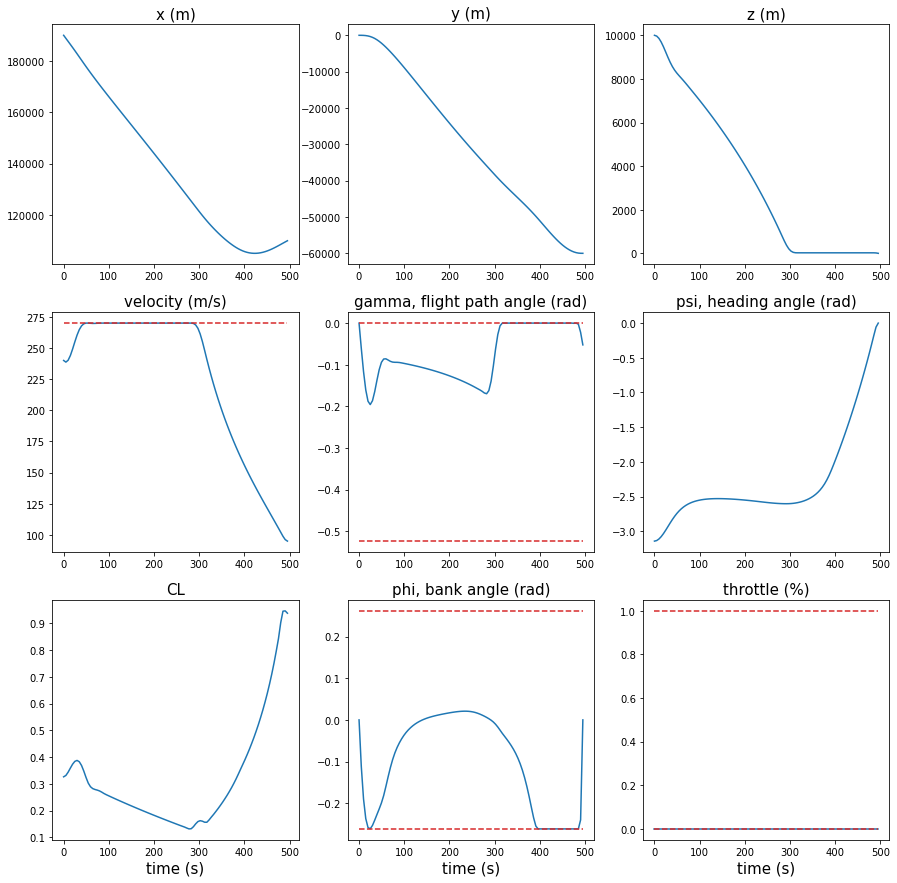

In [27]:
t_index = np.array([i for i in range(N+1)]) / N * tfbar
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.plot(t_index,xbar[:,0],label='solution')
plt.title('x (m)',fontsize=15)

plt.subplot(332)
plt.plot(t_index,xbar[:,1])
plt.title('y (m)',fontsize=15)

plt.subplot(333)
plt.plot(t_index,xbar[:,2])
plt.title('z (m)',fontsize=15)


plt.subplot(334)
plt.plot(t_index,xbar[:,3])
plt.plot(t_index,ubar[:,2]*0 + myConst.v_max,'--',color='tab:red')
# plt.plot(t_index,ubar[:,2]*0 + myConst.v_min,'--',color='tab:red')
plt.title('velocity (m/s)',fontsize=15)

plt.subplot(335)
plt.plot(t_index,xbar[:,4])
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_min,'--',color='tab:red')
plt.title('gamma, flight path angle (rad)',fontsize=15)

plt.subplot(336)
plt.plot(t_index,xbar[:,5])
plt.title('psi, heading angle (rad)',fontsize=15)

plt.subplot(337)
plt.plot(t_index,ubar[:,0])
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_max,'--',color='tab:red')
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_min,'--',color='tab:red')
plt.title('CL',fontsize=15)
plt.xlabel('time (s)',fontsize=15)
plt.subplot(338)
plt.plot(t_index,ubar[:,1])
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_min,'--',color='tab:red')
plt.title('phi, bank angle (rad)',fontsize=15)
plt.xlabel('time (s)',fontsize=15)
plt.subplot(339)
plt.plot(t_index,ubar[:,2])
plt.plot(t_index,ubar[:,2]*0 + myConst.T_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.T_min,'--',color='tab:red')
plt.title('throttle (%)',fontsize=15)
plt.xlabel('time (s)',fontsize=15)

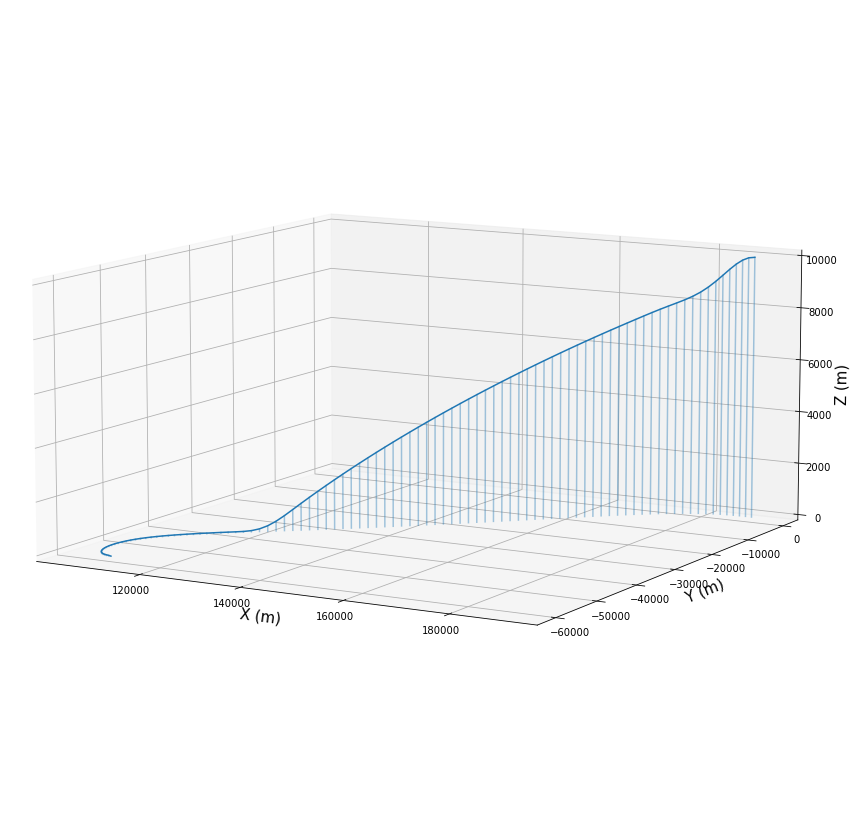

In [28]:
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X (m)',fontsize=15)
ax.set_ylabel('Y (m)',fontsize=15)
ax.set_zlabel('Z (m)',fontsize=15)

ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],'-')
for x in xbar :
    ax.plot([x[0],x[0]], [x[1],x[1]], [0,x[2]],'-',alpha=0.4,color='tab:blue')
ax.set_box_aspect(aspect = (1,1,0.5))
ax.view_init(10, -60)


In [ ]:
# filenames = []
# for idx in range(N+1) :
#     rx,ry,rz = xbar[idx,0],xbar[idx,1],xbar[idx,2]
#     phi,gamma,psi = ubar[idx,1],-xbar[idx,4],xbar[idx,5]
#     C1 = np.array([[1,0,0],[0,np.cos(phi),np.sin(phi)],[0,-np.sin(phi),np.cos(phi)]])
#     C2 = np.array([[np.cos(gamma),0,-np.sin(gamma)],[0,1,0],[np.sin(gamma),0,np.cos(gamma)]])
#     C3 = np.array([[np.cos(psi),np.sin(psi),0],[-np.sin(psi),np.cos(psi),0],[0,0,1]])

#     CIB = C1@C2@C3
#     length = 5000

#     d = []
#     d.append(np.dot(np.transpose(CIB), np.array([length, 0, 0])))
#     d.append(np.dot(np.transpose(CIB), np.array([0, length, 0])))
#     d.append(np.dot(np.transpose(CIB), np.array([0, -length, 0])))
#     d.append(np.dot(np.transpose(CIB), np.array([-length, 0, 0])))

#     fig = plt.figure(1,figsize=(15,15))
#     ax = fig.add_subplot(111, projection='3d')
    

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')

#     ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],'-')
#     for d1 in d[:4] :
#         ax.quiver(rx,ry,rz,d1[0],d1[1],d1[2],arrow_length_ratio=0,color='tab:red')
#     ax.plot(rx+d[0][0],ry+d[0][1],rz+d[0][2],'o',color='tab:green')


#     ax.view_init(10, -80)
#     ax.set_box_aspect(aspect = (1,1,0.2))
#     if idx == 0 :
#         x_scale = ax.get_xlim()
#         y_scale = ax.get_ylim()
#         z_scale = ax.get_zlim()
#     ax.auto_scale_xyz(x_scale, y_scale, z_scale)
#     ax.text(0,0,15000,"simulation time : {:4.3f}".format(t_index[idx]),fontsize=15)

#     filename = '../images/{:d}.png'.format(idx)
#     plt.savefig(filename)
#     filenames.append(filename)
#     plt.close()

In [ ]:
# img_name = 'airplane_landing_0222_03'
# with imageio.get_writer('../images/'+img_name+'.gif', mode='I') as writer:
#         for filename in filenames:
#             image = imageio.imread(filename)
#             writer.append_data(image)
# for filename in set(filenames):
#     os.remove(filename)

In [ ]:
import imageio
import os